# Automated Literature Review with Arcas for Python

Arcas is a python module providing programmatic access to metadata from the following journals:
- IEEE (10 calls per minute / 200 calls per day)
- PLOS
- Nature
- Springer
- arXiv

#### Installation

To use this notebook you need to install the Arcas module from the command line using `pip install arcas`.

#### Documentation

- Arcas GitHub repository: https://github.com/ArcasProject/Arcas
- Arcas documentation: http://arcas.readthedocs.io/en/latest/index.html

The Arcas module provides for search using the following parameters:
- `author` - Searches both first name and last name.
- `title` - Locate documents containing a word or phrase in the “article title” element.
- `abstract` - Locate documents containing a word or phrase in the “abstract” element.
- `year` - The value for publication year.
- `category` - Allows users to search the by keywords given to an article.
- `journal` - Locate documents containing a word or phrase in the “full journal/publication title” element.
- `records` - The number of records to fetch.
- `start` - Sequence number of first record to fetch.

**Notes:** 

1. Arcas can fail if the queried API returns no results (e.g. the Nature API). Its worth querying for a single result before performing a larger searches.
2. Arcas returns multiple entries for each paper because it creates a separate row for each author on a paper.
3. Currently, the following APIs require you to register for an API key:

    - IEEE Xplore: https://developer.ieee.org/member/register
    - Springer Open Access API: https://dev.springernature.com/login

The API keys currently have to be added to files within the module source code: https://arcas.readthedocs.io/en/latest/Guides/api_key.html

# Import libraries

In [ ]:
import arcas
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Request articles from a single source

In [77]:
# Comment or uncomment one journal entry as required
api = arcas.Arxiv()
#api = arcas.Ieee() #requires api key
#api = arcas.Nature()
#api = arcas.Plos()
#api = arcas.Springer() #requires api key

# Sprecify search criteria
search_term = 'virtual reality'
number_articles = 1

#### Set request parameters and format url

In [78]:
parameters = api.parameters_fix(title = search_term, abstract = search_term, records = number_articles)
url = api.create_url_search(parameters)

http://export.arxiv.org/api/query?search_query=ti:Virtual Reality&abs:Virtual Reality&max_results=1


#### Make API request

In [79]:
request = api.make_request(url)
root = api.get_root(request)
raw_articles = api.parse(root)

#### Check raw article output

In [80]:
print(raw_articles[0])

{'entry': '\n    ', 'id': 'http://arxiv.org/abs/0903.4314v1', 'updated': '2009-03-25T12:16:29Z', 'published': '2009-03-25T12:16:29Z', 'title': 'Virtual Reality', 'summary': '  This paper is focused on the presentation of Virtual Reality principles\ntogether with the main implementation methods and techniques. An overview of\nthe main development directions is included.\n', 'author': '\n      , \n      ', 'name': 'Dan L. Lacrama, Dorina Fera', 'comment': '8 pages, exposed on 4th International Conferences "Actualities and\n  Perspectives on Hardware and Software" - APHS2007, Timisoara, Romania', 'journal_ref': 'Ann. Univ. Tibiscus Comp. Sci. Series V (2007), 137-144', 'link': None, 'primary_category': None, 'category': None}


#### Loop through raw response and output to dataframe

In [81]:
#Create a list of dataframes 
dfs = []

#Convert each article to a dataframe and add it to the list
for art in raw_articles:
    article = api.to_dataframe(art)
    dfs.append(article)
    
#Concatenate the articles into a single dataframe
df = pd.concat(dfs, sort=False)

#### Display the dataframe and summary statistics

In [82]:
#Dataframe head
df.head()

,url,key,unique_key,title,author,abstract,doi,date,journal,provenance,primary_category,category,score,open_access
0,http://arxiv.org/abs/0903.4314v1,Lacrama2009,8eba088bb4f70fb7142301746ca6887e,Virtual Reality,Dan L. Lacrama,This paper is focused on the presentation of...,None,2009,Ann. Univ. Tibiscus Comp. Sci. Series V (2007)...,arXiv,None,None,Not available,True
1,http://arxiv.org/abs/0903.4314v1,Lacrama2009,8eba088bb4f70fb7142301746ca6887e,Virtual Reality,Dorina Fera,This paper is focused on the presentation of...,None,2009,Ann. Univ. Tibiscus Comp. Sci. Series V (2007)...,arXiv,None,None,Not available,True


In [83]:
#Summary information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 14 columns):
url                 2 non-null object
key                 2 non-null object
unique_key          2 non-null object
title               2 non-null object
author              2 non-null object
abstract            2 non-null object
doi                 0 non-null object
date                2 non-null int64
journal             2 non-null object
provenance          2 non-null object
primary_category    0 non-null object
category            0 non-null object
score               2 non-null object
open_access         2 non-null bool
dtypes: bool(1), int64(1), object(12)
memory usage: 290.0+ bytes


In [84]:
#Unique articles
len(df['unique_key'].unique())

1

#### Save dataframe to CSV

In [85]:
df.to_csv('../software_data.csv')

#### Delete dataframe

In [86]:
del df

# Request articles from multiple sources

In [87]:
# Sprecify search criteria
search_term = 'augmented reality'
number_articles = 200

In [88]:
#Create a list of dataframes 
dfs = []

#Loop through each API and request articles
for p in [arcas.Arxiv, arcas.Ieee, arcas.Plos, arcas.Springer]:
    for start in range(2):
        api = p()
        parameters = api.parameters_fix(title = search_term, abstract = search_term, records = number_articles, start = (start * number_articles))
        url = api.create_url_search(parameters)
        request = api.make_request(url)
        root = api.get_root(request)
        raw_articles = api.parse(root)
        
        #Convert each article to a dataframe and add it to the list
        for art in raw_articles:
            article = api.to_dataframe(art)
            dfs.append(article)
            
#Concatenate the articles into a single dataframe
df = pd.concat(dfs, sort = False)

C:\Users\olive\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\olive\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Springer does not support argument abstract.

Springer does not support argument abstract.



#### Display the dataframe and summary statistics

In [89]:
#Dataframe head
df.head()

,url,key,unique_key,title,author,abstract,doi,date,journal,provenance,primary_category,category,score,open_access
0,http://arxiv.org/abs/1106.5571v1,Prochazka2011,77400c97e08de5230f40638208a5a860,Mobile Augmented Reality Applications,David Prochazka,Augmented reality have undergone considerabl...,None,2011,Proceedings of Mendel 2011: 17th International...,arXiv,None,None,Not available,True
1,http://arxiv.org/abs/1106.5571v1,Prochazka2011,77400c97e08de5230f40638208a5a860,Mobile Augmented Reality Applications,Michael Stencl,Augmented reality have undergone considerabl...,None,2011,Proceedings of Mendel 2011: 17th International...,arXiv,None,None,Not available,True
2,http://arxiv.org/abs/1106.5571v1,Prochazka2011,77400c97e08de5230f40638208a5a860,Mobile Augmented Reality Applications,Ondrej Popelka,Augmented reality have undergone considerabl...,None,2011,Proceedings of Mendel 2011: 17th International...,arXiv,None,None,Not available,True
3,http://arxiv.org/abs/1106.5571v1,Prochazka2011,77400c97e08de5230f40638208a5a860,Mobile Augmented Reality Applications,Jiri Stastny,Augmented reality have undergone considerabl...,None,2011,Proceedings of Mendel 2011: 17th International...,arXiv,None,None,Not available,True
0,http://arxiv.org/abs/1508.02606v1,Hu2015,47d2aba5ea0b9620e4238564c2fd9614,InAR:Inverse Augmented Reality,Hao Hu,Augmented reality is the art to seamlessly f...,None,2015,arXiv,arXiv,None,None,Not available,True


In [90]:
#Summary information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8551 entries, 0 to 4
Data columns (total 14 columns):
url                 7503 non-null object
key                 8551 non-null object
unique_key          8551 non-null object
title               8551 non-null object
author              8551 non-null object
abstract            8548 non-null object
doi                 7108 non-null object
date                8450 non-null object
journal             8551 non-null object
provenance          8551 non-null object
primary_category    0 non-null object
category            7056 non-null object
score               8551 non-null object
open_access         8551 non-null object
dtypes: object(14)
memory usage: 1002.1+ KB


In [91]:
#Unique articles
len(df['unique_key'].unique())

913

In [92]:
#Article provenance
provenance_table = df.groupby(['unique_key', 
                               'provenance']).size().reset_index()
provenance_table = provenance_table.groupby('provenance').size()
provenance_table

provenance
IEEE        397
PLOS         16
Springer    100
arXiv       400
dtype: int64

#### Display Unique Articles per Year by Provenance

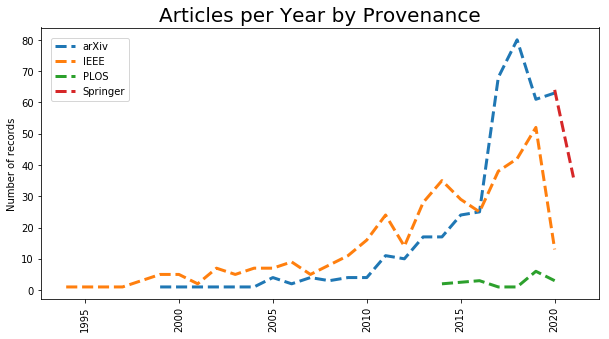

In [93]:
prov_per_year = df.groupby(['unique_key','provenance', 
                      'date']).size().reset_index()
prov_per_year = prov_per_year.groupby(['provenance', 'date']).size()


fig = plt.figure(figsize = (10, 5))

plt.title('Articles per Year by Provenance', fontsize = 20)
plt.ylabel('Number of records', fontsize = 10); 

plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10, rotation = 90); 
    
plt.plot(prov_per_year['arXiv'], linestyle = '--', label = "arXiv", linewidth = 3)
plt.plot(prov_per_year['IEEE'], linestyle = '--', label = "IEEE", linewidth = 3)
plt.plot(prov_per_year['PLOS'], linestyle = '--',label = "PLOS", linewidth = 3)
plt.plot(prov_per_year['Springer'], linestyle = '--', label = "Springer", linewidth = 3)

plt.legend(loc = 2, borderaxespad = 1, fontsize = 10)
plt.show()

#### Display Unique Articles per Year

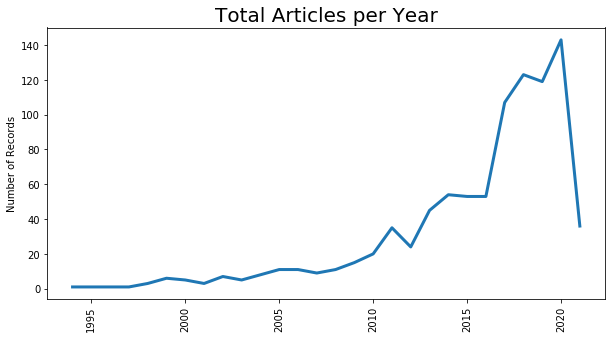

In [94]:
articles_per_year = df.groupby(['unique_key', 'date']).size().reset_index().groupby('date').size()

fig, ax = plt.subplots(figsize = (10, 5))

plt.title('Total Articles per Year', fontsize = 20)
plt.ylabel('Number of Records', fontsize = 10); 

ax.plot(articles_per_year, zorder = 1, linewidth = 3)

plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10, rotation = 90); 

plt.show()

#### Save dataframe to CSV

In [95]:
df.to_csv('../software_data.csv')

#### Clear dataframe

In [17]:
del df